## **CLASIFICACIÓN DE IMÁGENES DE RETINOPATÍA DIABÉTICA DE ACUERDO A SU GRAVEDAD**

**Presentado por:** Jessica Fernanda Pedraza Cadena (2151853)

**Descripción:** A partir de un dataset que contiene imágenes de escaneo de retina con filtro gaussiano de tamaño 224 x 224 se pretende entrenar una red neuronal para que aprenda a clasificar por si sola si una persona tiene retinopatía diabética y la gravedad o la etapa en la que se encuentra. Además de esto se compara el accuracy de dicha red con otros métodos de clasificación.

<img src="https://saludprimero.mx/wp-content/uploads/2019/11/retinopat%C3%ADa-diab%C3%A9tica-810x456.jpg" alt="Drawing" height="240" width="500">

In [0]:
 from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
#Librerias 
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

Se definen las clases de la siguiente manera:


*   0 No_DR (No tiene Retinopatía diabetica)
*   1 Mild (Retinopatía diabetica leve)
*   2 Moderate (Retinopatía diabetica moderada)
*   3 Severe (Retinopatía diabetica severa)
*   4 Proliferate_DR (Retinopatía diabetica proliferada)


  
  
  

Lo primero que hacemos es dividir las imagenes, se hace una división manual de las mismas, 80% para el TRAIN y 20 % para el TEST.


### **TRAIN**

In [0]:
#especifica la ruta y lee el nombre de los documentos dentro de dicha carpeta
path_classes = '/content/drive/My Drive/Proyecto_IA_2151853/TRAIN/No_DR'
classes_names = os.listdir(path_classes) #lista los archivos y guarda el nombre de cada uno en un vector
X_train=[] #lista con caracteristicas 
y_train=[] #lista con etiquetas
dim = (224,224)

#carga la imagenes
for i in classes_names:
  img = cv2.imread(path_classes+'/'+i) #libreria de openCv para leer imagenes y videos // guardamos la imagen con ese nombre porque en py es comun utilizar toda la ruta
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #convertir una imagen de color a escala de grises
  gray = cv2.resize(gray, dim)

  X_train.append(gray.flatten()) #guarda la imagen en la lista
  y_train.append(0) #0 No_DR

In [0]:
path_classes = '/content/drive/My Drive/Proyecto_IA_2151853/TRAIN/Mild'
classes_names = os.listdir(path_classes)

for i in classes_names:
  img = cv2.imread(path_classes+'/'+i) 
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

  X_train.append(gray.flatten()) 
  y_train.append(1) #1 Mild

In [0]:
path_classes = '/content/drive/My Drive/Proyecto_IA_2151853/TRAIN/Moderate'
classes_names = os.listdir(path_classes) 

for i in classes_names:
  img = cv2.imread(path_classes+'/'+i) 
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

  X_train.append(gray.flatten()) 
  y_train.append(2) #2 Moderate

In [0]:
path_classes = '/content/drive/My Drive/Proyecto_IA_2151853/TRAIN/Severe'
classes_names = os.listdir(path_classes) 

for i in classes_names:
  img = cv2.imread(path_classes+'/'+i) 
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

  X_train.append(gray.flatten()) 
  y_train.append(3) #3 Severe

In [0]:
path_classes = '/content/drive/My Drive/Proyecto_IA_2151853/TRAIN/Proliferate_DR'
classes_names = os.listdir(path_classes) 

for i in classes_names:
  img = cv2.imread(path_classes+'/'+i) 
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

  X_train.append(gray.flatten()) 
  y_train.append(4) #4 Proliferate_DR

Como vemos, cada directorio que a su vez es una clase, se lee de manera individual. Se procede a revolver los datos asi:

In [0]:
perm = np.random.permutation(range(len(X_train)))
X_train = np.r_[X_train]
y_train=np.r_[y_train]
X_train=X_train[perm]
y_train=y_train[perm]
print(X_train.shape) 

(1307, 50176)


La cantidad de imagenes para trabajar en el TRAIN es de 1307. Para observar de manera general nuestros datos realizamos lo siguiente:

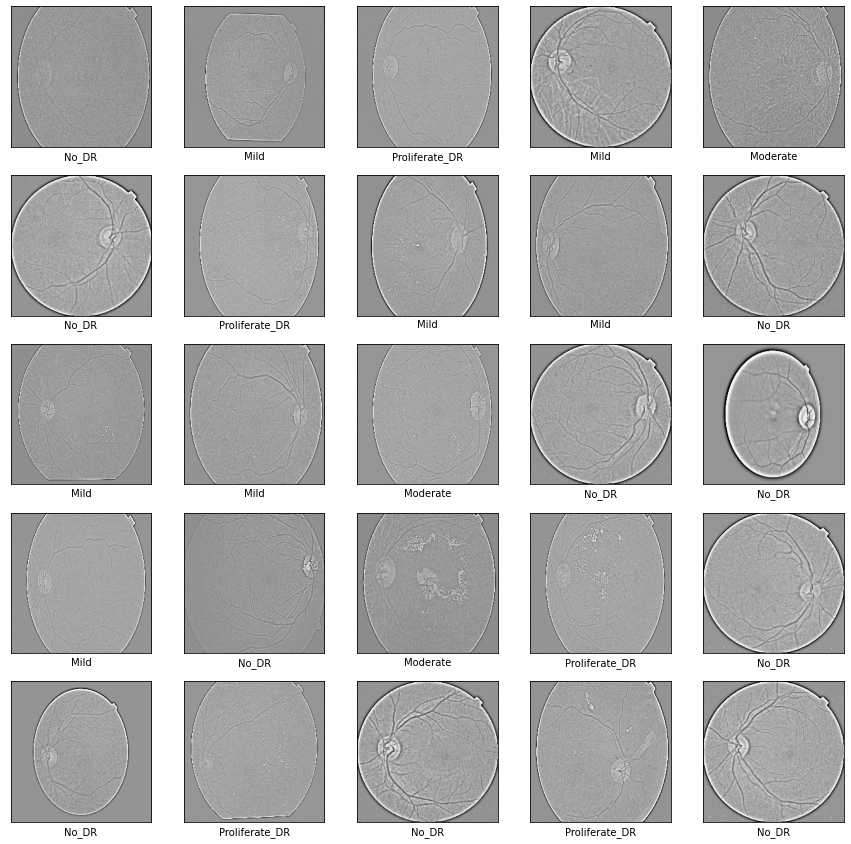

In [0]:
class_names = ['No_DR','Mild','Moderate','Severe','Proliferate_DR']
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(224,224), cmap=plt.cm.Greys_r)
    plt.xlabel(class_names[y_train[i]])

Y aqui se imprime la cantidad de imagenes por clase.

In [0]:
print( "  clase   # de imágenes")
for i in np.unique(y_train):
    print( "   ",int(i), "       ", np.sum(y_train==i))

  clase   # de imágenes
    0         317
    1         296
    2         304
    3         154
    4         236


### **TEST**




Para el TEST realizamos lo mismo, cargamos nuestras imagenes, las revolvemos y las imprimimos.

In [0]:
path_classes = '/content/drive/My Drive/Proyecto_IA_2151853/TEST/No_DR'
classes_names = os.listdir(path_classes)
X_test=[]
y_test=[]
dim = (224,224)

for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  X_test.append(gray.flatten())
  y_test.append(0) #0 No_DR

In [0]:
path_classes = '/content/drive/My Drive/Proyecto_IA_2151853/TEST/Mild'
classes_names = os.listdir(path_classes)

for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  X_test.append(gray.flatten())
  y_test.append(1) #1 Mild

In [0]:
path_classes = '/content/drive/My Drive/Proyecto_IA_2151853/TEST/Moderate'
classes_names = os.listdir(path_classes)

for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  X_test.append(gray.flatten())
  y_test.append(2) #2 Moderate

In [0]:
path_classes = '/content/drive/My Drive/Proyecto_IA_2151853/TEST/Severe'
classes_names = os.listdir(path_classes)

for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  X_test.append(gray.flatten())
  y_test.append(3) #3 Severe

In [0]:
path_classes = '/content/drive/My Drive/Proyecto_IA_2151853/TEST/Proliferate_DR'
classes_names = os.listdir(path_classes)

for i in classes_names:
  img = cv2.imread(path_classes+'/'+i)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  X_test.append(gray.flatten())
  y_test.append(4) #4 Proliferate_DR

In [0]:
#Se revuelven
perm = np.random.permutation(range(len(X_test)))
X_test = np.r_[X_test]
y_test=np.r_[y_test]
X_test=X_test[perm]
y_test=y_test[perm]
print(X_test.shape) 

(261, 50176)


La cantidad de imagenes para trabajar en el TEST es de 261.

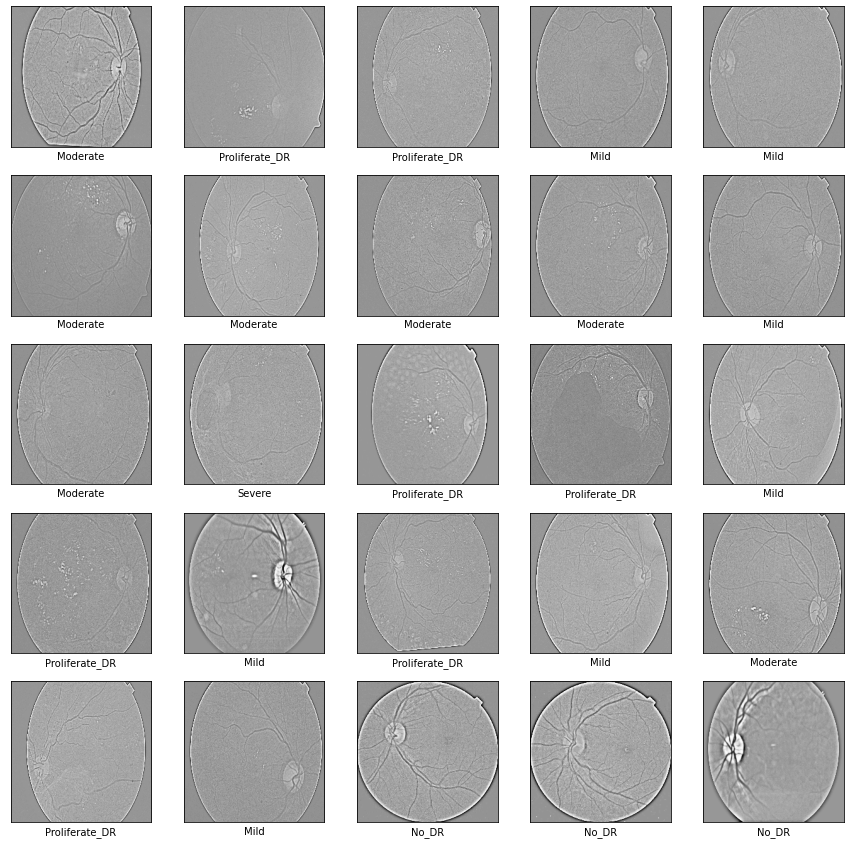

In [0]:
#Se imprimen
class_names = ['No_DR','Mild','Moderate','Severe','Proliferate_DR']
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(224,224), cmap=plt.cm.Greys_r)
    plt.xlabel(class_names[y_test[i]])

In [0]:
print( "  clase   # de imágenes")
for i in np.unique(y_test):
    print( "   ",int(i), "       ", np.sum(y_test==i))

  clase   # de imágenes
    0         63
    1         59
    2         61
    3         31
    4         47


### Entrenamos nuestra **Red Neuronal**

Importamos las librerias necesarias, entre ellas tensorflow y keras.

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

Lo que hacemos a continuación es preprocesar el valor de los pixeles de cada imagen y lo normalizamos para que tengan un valor entre 0 y 1, se divide entre 255 ya que este valor varia entre 0 y 255.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.
X_test = X_test / 255.

Además, haremos el **one-hot encoding** con **to_categorical** , que se refiere a convertir las etiquetas (nuestras clases) por ejemplo de Severe un 3 a una salida de tipo (0 0 0 1 0). Esto es porque asi funcionan mejor las redes neuronales para clasificar y se corresponde con una capa de salida de la red neuronal de 5 neuronas.

In [0]:
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)
 
print('Original label:', y_train[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0.]


Se crea el modelo apoyandonos en keras, así:

In [0]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=X_train[0].shape), 
  keras.layers.Dense(200, activation=tf.nn.relu), 
  keras.layers.Dense(50, activation=tf.nn.relu),

  keras.layers.Dense(5, activation=tf.nn.softmax) 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 200)               10035400  
_________________________________________________________________
dense_4 (Dense)              (None, 50)                10050     
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 255       
Total params: 10,045,705
Trainable params: 10,045,705
Non-trainable params: 0
_________________________________________________________________


Se utilizó la función "relu" como activación de las neuronas. Una capa oculta de 200 y otra de 50. Finalizamos con una capa de salida con 5 neuronas correspondientes a la cantidad de clases y a su vez con el hot encoding que hicimos antes, esta tiene activación "softmax".

Ejecutamos nuestra máquina de aprendizaje utilizando el optimizador "adam".

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Entrenamos el modelo y validamos

In [0]:
history = model.fit(X_train, y_train, epochs=20, batch_size=70, verbose=1, validation_data=(X_test, y_test))

Epoch 1/20
19/19 [==============================] - 2s 92ms/step - loss: 1.5862 - accuracy: 0.2326 - val_loss: 1.5804 - val_accuracy: 0.2261
Epoch 2/20
19/19 [==============================] - 2s 89ms/step - loss: 1.5706 - accuracy: 0.2624 - val_loss: 1.5675 - val_accuracy: 0.2605
Epoch 3/20
19/19 [==============================] - 2s 89ms/step - loss: 1.5539 - accuracy: 0.3259 - val_loss: 1.5474 - val_accuracy: 0.3716
Epoch 4/20
19/19 [==============================] - 2s 89ms/step - loss: 1.5321 - accuracy: 0.3956 - val_loss: 1.5176 - val_accuracy: 0.3985
Epoch 5/20
19/19 [==============================] - 2s 88ms/step - loss: 1.4906 - accuracy: 0.4239 - val_loss: 1.4756 - val_accuracy: 0.4100
Epoch 6/20
19/19 [==============================] - 2s 90ms/step - loss: 1.4411 - accuracy: 0.4109 - val_loss: 1.4245 - val_accuracy: 0.4061
Epoch 7/20
19/19 [==============================] - 2s 88ms/step - loss: 1.4136 - accuracy: 0.4101 - val_loss: 1.4236 - val_accuracy: 0.2797
Epoch 8/20
19

Ponemos a prueba el modelo

In [0]:
test_loss,test_acc = model.evaluate(X_test, y_test,verbose=1)
print('Test accuracy:', test_acc)

9/9 [==============================] - 0s 15ms/step - loss: 1.2425 - accuracy: 0.5249
Test accuracy: 0.524904191493988


Vemos que tras 20 iteraciones completas al set de entrenamiento, logramos un valor de precision del 52% 

Y al graficar...

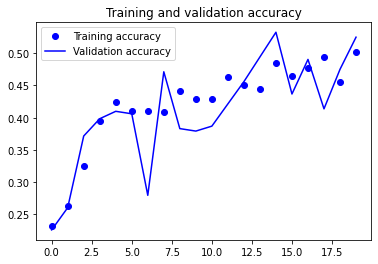

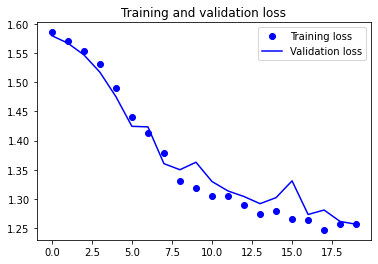

In [0]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Observamos que en la primera gráfica la precisión del entrenamiento y la precision de validación siguen el mismo comportamiento. En la segunda gráfica se evidencia lo mismo pero con las pérdidas, esto es bueno dados los resultados de nuestro modelo.

**Evaluando nuestro modelo**

In [0]:
predicted_classes2 = model.predict(X_test)

In [0]:
predicted_classes=[]
for predicted in predicted_classes2:
    predicted_classes.append(predicted.tolist().index(max(predicted)))
predicted_classes=np.array(predicted_classes)

In [0]:
predicted_classes.shape, y_test.shape

((261,), (261,))

Se encontraron 137 etiquetas correctas


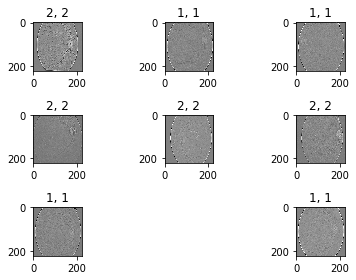

In [0]:
correct = np.where(predicted_classes==y_test)[0]
print("Se encontraron %d etiquetas correctas" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(224,224), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

Se encontraron 124 etiquetas incorrectas


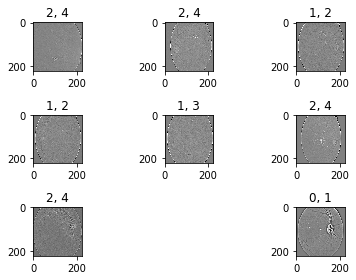

In [0]:
incorrect = np.where(predicted_classes!=y_test)[0]
print("Se encontraron %d etiquetas incorrectas" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(224,224), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(predicted_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

Realizamos algunas predicciones

In [0]:
predictions = model.predict(X_test)
print(predictions[0])
print("valor predicho:",  np.argmax(predictions[0]), "max prob: ", np.max(predictions[0]),"ground truth: ", y_test[0] )

[0.09963882 0.18708666 0.30834457 0.16603911 0.2388908 ]
valor predicho: 2 max prob:  0.30834457 ground truth:  2


In [0]:
predictions = model.predict(X_test)
print(predictions[1])
print("valor predicho:",  np.argmax(predictions[1]), "max prob: ", np.max(predictions[1]),"ground truth: ", y_test[1] )

[0.15422545 0.1838847  0.27955672 0.15562496 0.22670822]
valor predicho: 2 max prob:  0.27955672 ground truth:  4


In [0]:
predictions = model.predict(X_test)
print(predictions[2])
print("valor predicho:",  np.argmax(predictions[2]), "max prob: ", np.max(predictions[2]),"ground truth: ", y_test[2] )

[0.09419759 0.18719497 0.31404984 0.1669337  0.23762381]
valor predicho: 2 max prob:  0.31404984 ground truth:  4


In [0]:
predictions = model.predict(X_test)
print(predictions[3])
print("valor predicho:",  np.argmax(predictions[3]), "max prob: ", np.max(predictions[3]),"ground truth: ", y_test[3] )

[0.03337686 0.31703243 0.24938552 0.15635526 0.24384987]
valor predicho: 1 max prob:  0.31703243 ground truth:  1


In [0]:
predictions = model.predict(X_test)
print(predictions[4])
print("valor predicho:",  np.argmax(predictions[4]), "max prob: ", np.max(predictions[4]),"ground truth: ", y_test[4] )

[0.04358485 0.28646505 0.25612506 0.16238174 0.2514432 ]
valor predicho: 1 max prob:  0.28646505 ground truth:  1


Como vemos los resultados no siempre fueron acertados, esto se debe a la baja precisión del modelo realizado.

## Otros métodos de clasificación

Clasificación con **DecisionTreeClassifier**

In [0]:
from sklearn.utils import shuffle
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 

est = DecisionTreeClassifier(max_depth=20) #maxima profundidad del arbol
X_s, y_s = shuffle(X_train,y_train, random_state=0)

n=int(len(X_s)*0.70) #cantidad de datos para train 70%
est.fit(X_s[:n], y_s[:n])

print('%.3f'%accuracy_score(est.predict(X_s[n:]),y_s[n:]))

0.450


**Clasificación con GaussianNB**

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
est = GaussianNB()

est.fit(X_train,y_train)
predictions = est.predict(X_train)
print("%.3f"%accuracy_score(predictions, y_train))

0.599


**Clasificación con RandomForestClassifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import *

est = RandomForestClassifier()

s = cross_val_score(est, X_train, y_train, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.557 (+/- 0.02953)


## **CONCLUSIONES**

*   Al ejecutar varias veces la red neuronal realizada, la mayor precisión obtenida fue del 52%, es decir que al pasarle una imagen completamente nueva no podremos confiar en el resultado aún, evidentemente no es un buen puntaje, para versiones próximas queda el compromiso de realizar los ajustes pertinentes para así mejorar el modelo y los resultados del mismo.
*   Al realizar el entrenamiento con otros modelos que también permiten clasificar, pudimos observar que: con DecisionTreeClasifier se obtuvo 45%, con GaussianNB se obtuvo 59% y con RandomForestClassifier se obtuvo 57% de precisión en los resultados, dando a entender que de los 4 (contando nuestra red) el mejor en este caso en cuanto a confiabilidad es el GuaussianNB.

